# MATH 210 Introduction to Mathematical Computing

## April 6, 2022

* Linear regression
* General regression
* Eigenvalues and eigenvectors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Linear regression

Consider $d+1$ points $(t_0,y_0),\dots,(t_d,y_d)$. Find the line $y = c_0 + c_1 t$ which best fits the data in the sense that it minimizes the sum of squared errors

$$
SSE = \sum_{n=0}^d (y_n - (c_0 + c_1 t_n))^2
$$

The coefficents $c_0$ and $c_1$ are the solution of the normal equations $A^T A \mathbf{c} = A^T \mathbf{y}$ where

$$
A = \begin{bmatrix} 1 & t_0 \\ 1 & t_1 \\ \vdots & \vdots \\ 1 & t_d \\ \end{bmatrix}
$$

Where do the normal equation come from? The SSE is the norm squared of a vector:

$$
SSE = \left\| \begin{bmatrix}
y_0 - (c_0 + c_1 t_0) \\
y_1 - (c_0 + c_1 t_1) \\
\vdots \\
y_d - (c_0 + c_1 t_d)
\end{bmatrix} \right\|^2
=
\| \mathbf{y} - A \mathbf{c} \|^2
$$

where

$$
\mathbf{y} = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_d \end{bmatrix}
\hspace{10mm}
\mathbf{c} = \begin{bmatrix} c_0 \\ c_1 \end{bmatrix}
$$

In other words, we want to find $\mathbf{c}$ such that $A \mathbf{c}$ is closest to $\mathbf{y}$. The vector $A \mathbf{c}$ is in the column space of $A$. Then $\mathbf{c}$ such that $A \mathbf{c}$ is closest to $\mathbf{y}$ happens when $A \mathbf{c} - \mathbf{y}$ is perpendicular to the column space. This means that $A^T (A \mathbf{c} - \mathbf{y}) = 0$ and so we get the normal equations

$$
A^T A \mathbf{c} = A^T \mathbf{y} 
$$

## Polynomial regression

Consider $d+1$ points $(t_0,y_0),\dots,(t_d,y_d)$. Find the polynomial of degree $k < d$ given by

$$
y = c_0 + c_1 t + \cdots + c_k t^k
$$

which best fits the data in the sense that it minimizes the sum of squared errors

$$
SSE = \sum_{n=0}^d (y_n - (c_0 + c_1 t_n + \cdots + c_k t_n^k))^2
$$

The coefficients $c_0, c_1, \dots, c_k$ are the solution of the normal equations $A^T A \mathbf{c} = A^T \mathbf{y}$ where

$$
A = \begin{bmatrix}
1 & t_0 & \cdots & t_0^k \\
1 & t_1 & \cdots & t_1^k \\
\vdots & \vdots & \ddots & \vdots \\
1 & t_d & \cdots & t_d^k \end{bmatrix}
$$

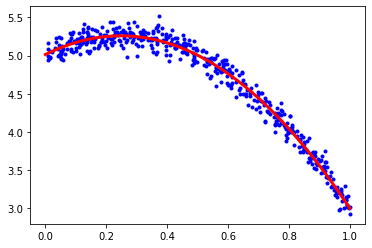

In [2]:
N = 500
t = np.random.rand(N)
noise = 0.1*np.random.randn(N)
y = 5 + 2*t - 4*t**2 + noise

A = np.column_stack((np.ones(N),t,t**2))
# A = np.vander(t,N=3,increasing=True)
c = la.solve(A.T@A,A.T@y)
T = np.linspace(0,1,50)
Y = c[0] + c[1]*T + c[2]*T**2
plt.plot(t,y,'b.')
plt.plot(T,Y,'r',lw=3)
plt.show()

## General regression

Consider $d+1$ points $(t_0,y_0),\dots,(t_d,y_d)$. Choose a set of linearly independent functions $f_0(t),f_1(t),\dots,f_k(t)$. Find a function

$$
F(t) = c_0 f_0(t) + c_1 f_1(t) + \cdots + c_k f_k(t)
$$

which best fits the data in the sense that it minimizes the sum of squared errors

$$
SSE = \sum_{n=0}^d (y_n - (c_0 f_0(t_n) + c_1 f_1(t_n) + \cdots + c_k f_k(t_n)))^2
$$

The coefficients $c_0, c_1, \dots, c_k$ are the solution of the normal equations $A^T A \mathbf{c} = A^T \mathbf{y}$ where

$$
A = \begin{bmatrix}
f_0(t_0) & f_1(t_0) & \cdots & f_k(t_0) \\
f_0(t_1) & f_1(t_1) & \cdots & f_k(t_1) \\
\vdots & \vdots & \ddots & \vdots \\
f_0(t_d) & f_1(t_d) & \cdots & f_k(t_d) \end{bmatrix}
$$

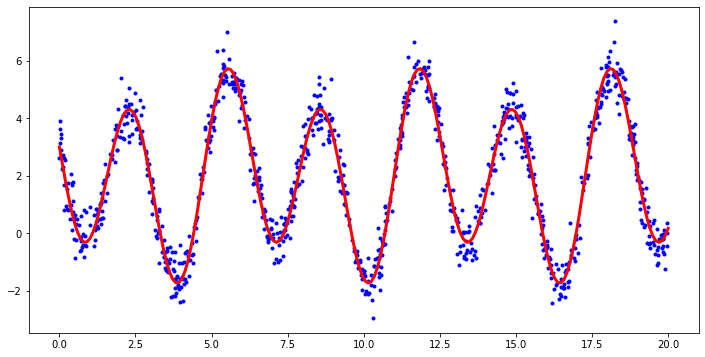

In [3]:
N = 1000
t = 20*np.random.rand(N)
noise = 0.5*np.random.randn(N)
y = 2 + np.cos(t) - 3*np.sin(2*t) + noise

# F(t) = c0 + c1 cos(t) + c2 sin(2t) , f0(t) = 1 , f1(t) = cos(t) , f2(t) = sin(2t)
A = np.column_stack((np.ones(N),np.cos(t),np.sin(2*t)))
c = la.solve(A.T@A,A.T@y)
T = np.linspace(0,20,200)
Y = c[0] + c[1]*np.cos(T) + c[2]*np.sin(2*T)
plt.figure(figsize=(12,6))
plt.plot(t,y,'b.')
plt.plot(T,Y,'r',lw=3)
plt.show()

In [4]:
c

array([ 1.99328003,  1.00546474, -3.00421815])